<a href="https://colab.research.google.com/github/MagdalenaKumala/Projekt2.github.io/blob/main/BDD_Ko%C5%82odziejczyk_Kumala.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Kierunek: **Informatyka i Ekonometria**

Przedmiot: **Elementy Sztucznej Inteligencji**

**Grupa 2**
 
Projekt wykonały:

**Zuzanna Kołodziejczyk, Magdalena Kumala**





# Zagadnienia teoretyczne

**Drzewa decyzyjne**  to graficzny sposób przedstawienia procesu decyzyjnego. Drzewo to ma sporo zastosowań, może rozwiązywać problem decyzyjny oraz stworzyć plan. Metoda drzew decyzyjnych bardzo dobrze się sprawdza, gdy rozpatrywane przez nas problemy decyzyjne mają wiele rozgałęziających się wariantów oraz kiedy podejmujemy decyzję w warunkach ryzyka. 

W drzewie decyzyjnym węzłami nazywamy poszczególne atrybuty, gałęzie to wartości odpowiadające tym atrybutom natomiast liście tworzą poszczególne decyzje. 

**`Entropią`** jest to miara stopnia nieuporządkowania elementów w zbiorze, określamy ją wzorem:

> 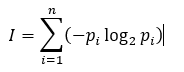

gdzie p to prawdopodobieństwo wystąpienia zdarzenia. 

#Nasze dane i rozwiązywany problem

W naszym projekcie zajęłyśmy się problemem w podjęciu decyzji odnośnie wyboru gry komputerowej. W celu uzyskania odpowiedzi określiłyśmy 5 przesłanek oraz możliwy wybór.

Przesłanki:
*   **czy_kooperacyjna** - tak/nie (czy można grać z kimś w parze)
*   **ilosc_godzin** - mało/średnio/dużo (jak długo gracz może cieszyć się grą)
*   **poziom_trudosci** - łatwy/średni/trudny (jak wymagająca może być gra)
*   **typ_gry** - przygodowa/fabularna/zręcznościowa/logiczna (do jakiej kategorii zalicza się gra)
* **swiat** - mały/średni/duży (jaka jest skala mapy i swobody poruszania graczy)

Możliwe rezultaty:
*   ***Uncharted***
*   ***Wiedźmin 3***
*   ***A way out***

Wybór odpowiednich rezultatów starałyśmy się dobrać zgodnie z kryteriami:
1.   Domyślnie Uncharted
2.   Jeżeli kooperacyjna to A way out
3.   Jeżeli gra fabularna i duży świat to Wiedźmin 3
4.   Jeżeli gra przygodowa i średni poziom trudności to Uncharted
5.   Jeżeli gra zręcznościowa i mały świat to A way out
6.   Jeżeli gra przygodowa i mała ilość godzin to A way out
7.   Jeżeli poziom trudności duży i duży świat to Wiedźmin 3












#Kod

##Biblioteki i dane

In [ ]:
#załączamy potrzebne biblioteki 
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import random
from pprint import pprint

In [ ]:
random.seed(0)
#dodajemy dane oraz przygotowywujemy je do późniejszych działań 
data = pd.read_csv("wybor_gry_dane.csv", sep=';')

print(data.head()) #wypisujemy nagłówki naszych danych 

  czy_kooperacyjna ilosc_godzin  ...   swiat    jaka_gra
0              nie         mało  ...    mały   A way out
1              nie         mało  ...  średni   A way out
2              nie         mało  ...    duży   A way out
3              nie         mało  ...    mały  Wiedźmin 3
4              nie         mało  ...  średni  Wiedźmin 3

[5 rows x 6 columns]


> ## Sprawdzamy ile jest klas

In [ ]:
def check_purity(data):
    label_column = data[:, -1] #sprawdzamy wartości w ostatniej kolumnie
    unique_classes = np.unique(label_column) #dzięki temu wiemy, że mamy trzy możliwości końcowe
#sprawdzamy, czy nasze decyzje są jednakowe czy różne
    if len(unique_classes) == 1:
        return True
    else:
        return False

> ## Klasyfikacja - które dane są najczęściej powtarzane

In [ ]:
def classify_data(data):
    label_column = data[:, -1]
#sprawdzamy, która gra pojawia się najczęściej:
    unique_classes, counts_unique_classes = np.unique(label_column, return_counts=True)
    index = counts_unique_classes.argmax() #index najczęściej powatarzanej
    classification = unique_classes[index]
    
    return classification

> ## Potencjalne rozłamy drzewa (gałęzi)

In [ ]:
def get_potential_splits(data):
    
    potential_splits = {} #biblioteka
    _, n_columns = data.shape
    for column_index in range(n_columns - 1): #sprawdzamy ile kolumn posiada nasz model zmiennych, 
#pierwsza liczba to liczba wierszy a druga kolumn, z liczby kolumn usuwamy ostatni wiersz, czyli label
        values = data[:, column_index] 
        unique_values = np.unique(values)
        
        potential_splits[column_index] = unique_values
    
    return potential_splits

> ## Dzielenie danych 

In [ ]:
def split_data(data, split_column, split_value):
    
    split_column_values = data[:, split_column]

    type_of_feature = FEATURE_TYPES[split_column]
    if type_of_feature == "continuous":
#wpisujemy do tablicy wszystkie dane, które w danej kolumnie są mniejsze niż split_value
        global data_below
        data_below = data[split_column_values <= split_value]
#wpisujemy do tablicy wszystkie dane, które w danej kolumnie są większe niż split_value
        global data_above
        data_above = data[split_column_values >  split_value]
    
#funkcja kategoryczna  
    else:
        data_below = data[split_column_values == split_value]
        data_above = data[split_column_values != split_value]
    
    return data_below, data_above

> ## Entropia

In [ ]:
def calculate_entropy(data):
#tworzymy klasę do obliczania entropii
    label_column = data[:, -1]
    _, counts = np.unique(label_column, return_counts=True) #sprawdzamy prawdopodobieństwo

    probabilities = counts / counts.sum()
    entropy = sum(probabilities * -np.log2(probabilities))
     
    return entropy

In [ ]:
def calculate_overall_entropy(data_below, data_above): #klasa obliczająca całkowitą entropię 
    
    n = len(data_below) + len(data_above)
    p_data_below = len(data_below) / n
    p_data_above = len(data_above) / n

    overall_entropy =  (p_data_below * calculate_entropy(data_below) 
                      + p_data_above * calculate_entropy(data_above))
    
    return overall_entropy

> ## Szukamy najlepszych rozłamów podziałów

In [ ]:
def determine_best_split(data, potential_splits):   
    overall_entropy = 9999
#pętla przechodząca przez słowniku wszystkich potencjalnych podziałów
    for column_index in potential_splits:
        for value in potential_splits[column_index]: #obliczamy entropię dla każdego potencjalnego rozłamu
            data_below, data_above = split_data(data, split_column=column_index, split_value=value)
            current_overall_entropy = calculate_overall_entropy(data_below, data_above)

            if current_overall_entropy <= overall_entropy: #jeżeli program znalazł niższą wartość entropii aktualizuje najlpeszy wynik
                overall_entropy = current_overall_entropy
#ustawiamy best_split_column oraz best_split_value na global, ponieważ używamy ich w dalszej części kodu, a w tym momencie definiowane 
#są tylko w funckji if do której program nie wchodzi jeżlei nie jest spełniony warunek konieczny 
                global best_split_column  
                best_split_column = column_index
                global best_split_value
                best_split_value = value
    
    return best_split_column, best_split_value

> ## Reprezentacja drzewa decyzyjnego

In [ ]:
#drzewo działa na podstawie pytań "tak", "nie"
sub_tree = {"question": ["yes_answer", 
                         "no_answer"]}

In [ ]:
#sprawdzamy typ funkcji 
def determine_type_of_feature(df):
    
    feature_types = []
    n_unique_values_treshold = 15
    for feature in df.columns:
        if feature != "label":
            unique_values = df[feature].unique()
            example_value = unique_values[0]

            if (isinstance(example_value, str)) or (len(unique_values) <= n_unique_values_treshold):
                feature_types.append("categorical")
            else:
                feature_types.append("continuous")
    
    return feature_types

> ## Algorytm drzewa decyzyjnego

In [ ]:
def decision_tree_algorithm(df, counter=0, min_samples=2, max_depth=5):
#przygotowywujemy nasze dane (transformujemy dane)
    if counter == 0:
        global COLUMN_HEADERS, FEATURE_TYPES
        COLUMN_HEADERS = df.columns
        FEATURE_TYPES = determine_type_of_feature(df)
        data = df.values
    else:
        data = df           
#część, która zatrzymuje działanie algorytmu, żeby nie wywoływał się w nieskończoność
    if (check_purity(data)) or (len(data) < min_samples) or (counter == max_depth):
        classification = classify_data(data)
        
        return classification
#część rekursywna (rekurencja)
    else:    
        counter += 1
#funkcje pomocnicze
        potential_splits = get_potential_splits(data)
        split_column, split_value = determine_best_split(data, potential_splits)
        data_below, data_above = split_data(data, split_column, split_value) #dzielimy dane 
#sprawdzamy, czy nie mamy do czynienia z pustymi danymi 
        if len(data_below) == 0 or len(data_above) == 0:
            classification = classify_data(data)
            return classification
#ustalamy pytanie, które ma być zadane
        feature_name = COLUMN_HEADERS[split_column]
        type_of_feature = FEATURE_TYPES[split_column]
        if type_of_feature == "continuous":
            question = "{} <= {}".format(feature_name, split_value)
#jeżeli funckja przyjmuje wartość kategoryczną
        else:
            question = "{} = {}".format(feature_name, split_value)
#tworzymy poddrzewa
        sub_tree = {question: []}
#znajdujemy odpowiedzi na pytania, aby stworzyć poddrzewa (wykorzystując rekurencję)
        yes_answer = decision_tree_algorithm(data_below, counter, min_samples, max_depth)
        no_answer = decision_tree_algorithm(data_above, counter, min_samples, max_depth)
#Jeżeli odpowiedzi są takie same wtedy nie ma sensu zadawać pytań. Może się to zdarzyć gdy zmienne nie są czyste.
        if yes_answer == no_answer:
            sub_tree = yes_answer
        else:
            sub_tree[question].append(yes_answer)
            sub_tree[question].append(no_answer)
        
        return sub_tree

In [ ]:
#wywołujemy nasze drzewo decyzyjne
tree = decision_tree_algorithm(data)

pprint(tree)

{'typ_gry = fabularna': [{'swiat = mały': [{'ilosc_godzin = dużo ': ['Wiedźmin '
                                                                     '3',
                                                                     {'poziom_trudnosci = łatwy': ['Uncharted',
                                                                                                   {'ilosc_godzin = średnio ': ['Wiedźmin '
                                                                                                                                '3',
                                                                                                                                'Uncharted']}]}]},
                                           'Wiedźmin 3']},
                         {'swiat = duży': [{'poziom_trudnosci = trudny ': [{'ilosc_godzin = dużo ': [{'typ_gry = zręcznościowa': ['Uncharted',
                                                                                                               

# Bibliografia

Informacje dotyczące drzewa decyzyjnego: 

https://pl.wikipedia.org/wiki/Drzewo_decyzyjne

https://mfiles.pl/pl/index.php/Drzewo_decyzyjne

Entropia: 

https://sjp.pl/entropia
https://teams.microsoft.com/_#/pdf/viewer/teams/https:~2F~2Faghedupl.sharepoint.com~2Fsites~2FElementysztucznejinteligencjiS2021~2FMateriay%20z%20zaj~2FPozyskiwanie%20wiedzy.pdf?threadId=19:18a6aae7353e491ab006e57805eede9a@thread.tacv2&baseUrl=https:~2F~2Faghedupl.sharepoint.com~2Fsites~2FElementysztucznejinteligencjiS2021&fileId=4afbc4b9-521e-4d4c-ab81-cc7a14c608df&ctx=files&rootContext=items_view&viewerAction=view

Poradnik: 

https://www.youtube.com/watch?v=y6DmpG_PtN0&list=PLPOTBrypY74xS3WD0G_uzqPjCQfU6IRK-